In [390]:
%matplotlib inline
import os              
import pandas as pd   
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

In [391]:
print("Current Working Dir:", os.getcwd())

## collect data     
data_path = '../datasets/Housing.csv'

df = pd.read_csv (data_path, thousands = ',')

Current Working Dir: c:\Users\topol\Hands-On-Machine-Learning-Projects\ML-Project-1


In [392]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [393]:
df.shape

(20640, 10)

In [394]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [395]:
df.describe ()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [396]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

#### Ocean proximity column is propably our catagorical attribute, since is repetitive

In [397]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [398]:
housing = df.copy()

#### convert this catagorical attribute into simple numeric:
#### `<1H OCEAN == 0`, `INLAND == 1`, `NEAR OCEAN == 2`, `NEAR BAY == 3`, `ISLAND == 4` 

In [399]:
housing['ocean_proximity'] = housing['ocean_proximity'].apply(lambda x: 
                                                    0 if x == '<1H OCEAN' else 
                                                    1 if x == 'INLAND' else 
                                                    2 if x == 'NEAR OCEAN' else 
                                                    3 if x == 'NEAR BAY' 
                                                    else 4)

In [400]:
housing['ocean_proximity'].value_counts()

ocean_proximity
0    9136
1    6551
2    2658
3    2290
4       5
Name: count, dtype: int64

In [401]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [402]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity         int64
dtype: object

In [403]:
## check missing values
#df.isna()

In [404]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [405]:
## total beds got a lot of missing values
housing.isna().mean()

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [406]:
## fill all missing values with the mean
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(housing['total_bedrooms'].mean())

In [407]:
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [408]:
## Look at the correlations between every pair of attributes using corr()
corr_matrix = housing.corr()
sorted_corr = corr_matrix['median_house_value'].sort_values(ascending= False)
print(sorted_corr)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
ocean_proximity       0.021732
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


#### Data Visualization to understand and gain insights about data

### Plots

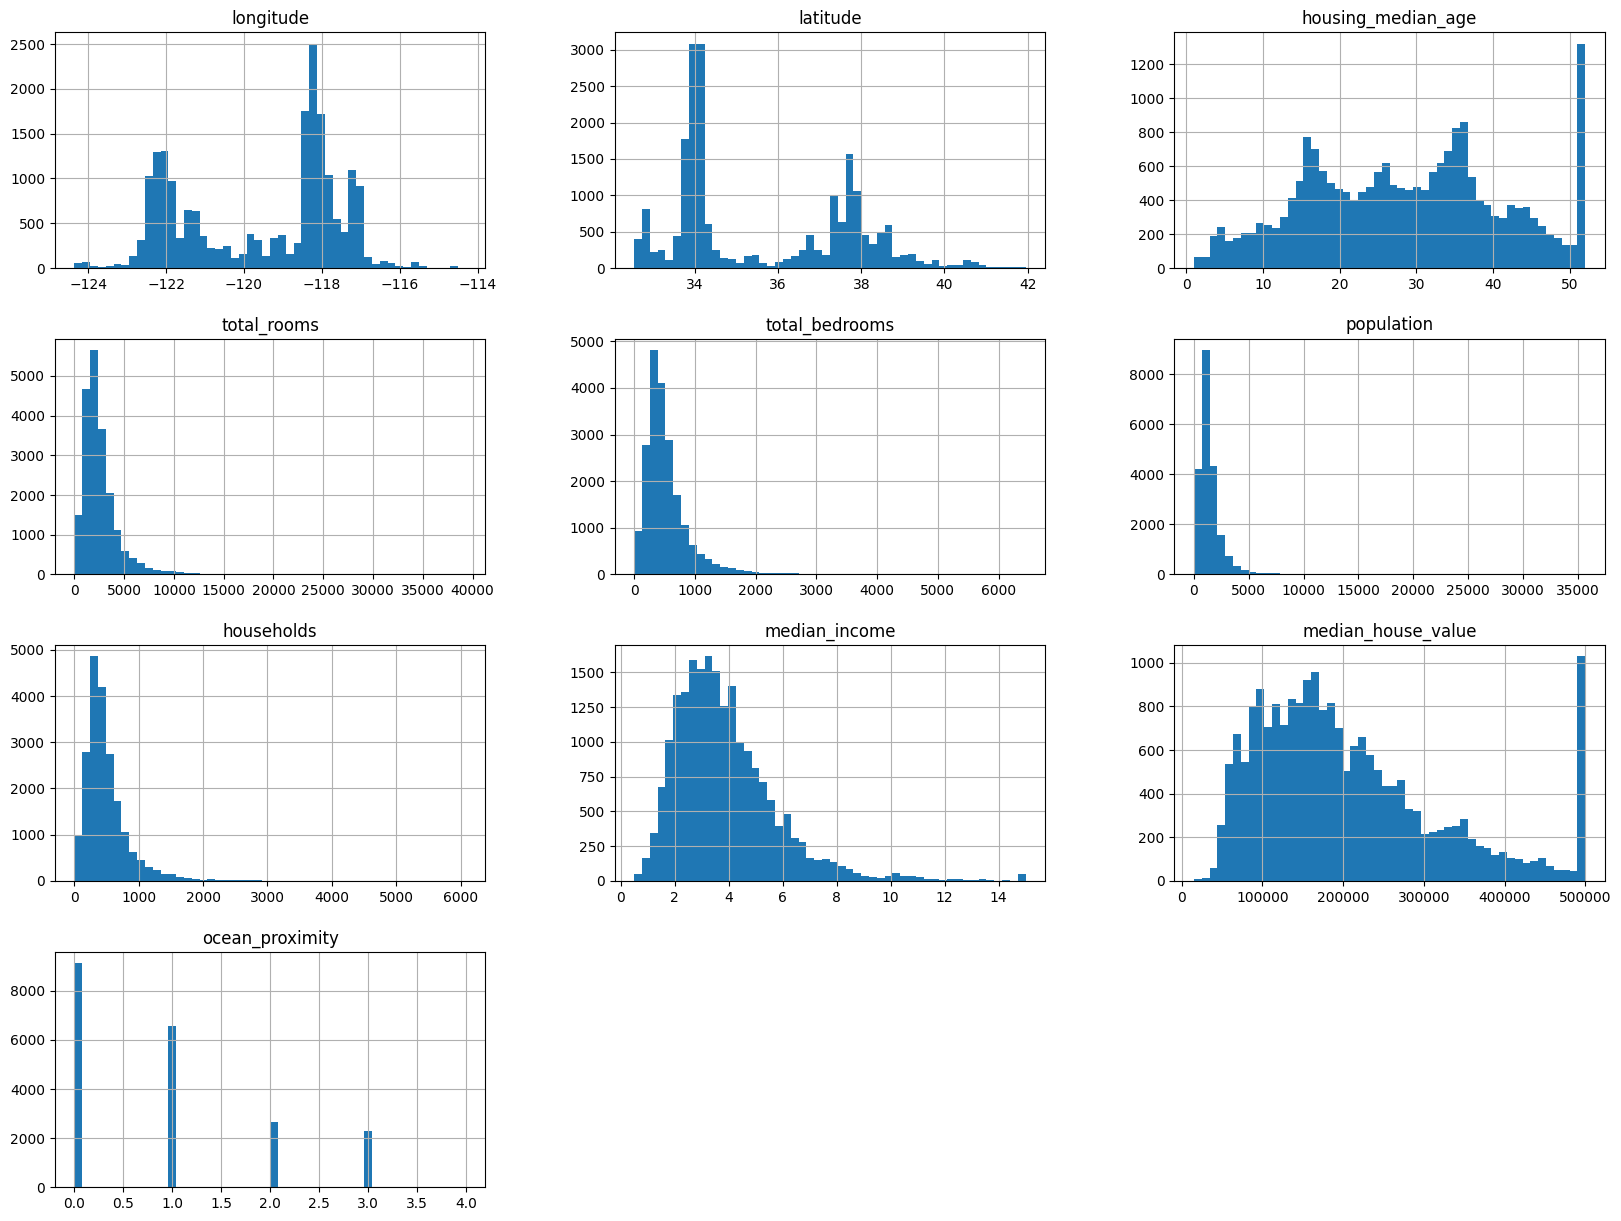

In [409]:
## plot all atributes
housing.hist(bins= 50, figsize= (20, 15))


plt.show ()

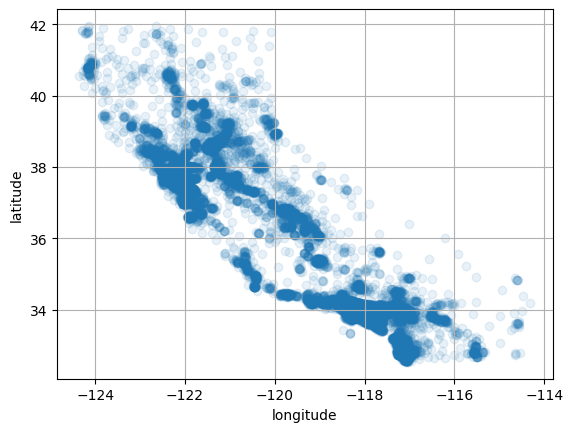

In [410]:
## lets look at geographical information
plt.scatter(housing['longitude'], housing['latitude'], alpha= 0.1)   # alpha for transparency to see better the density
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.grid()

plt.show()

#### lets look at prices

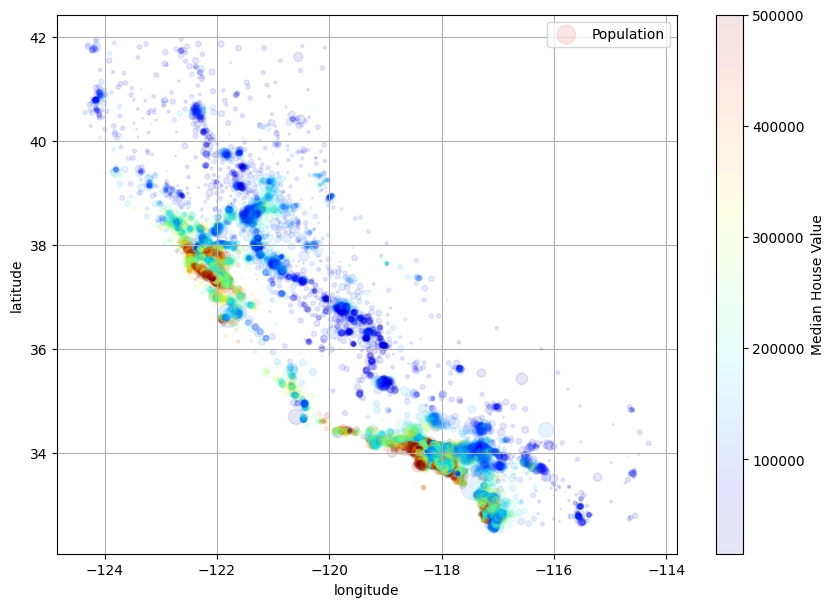

In [411]:
## colormap option cmap - jet to represents the price: blue(low) and red(high prices)
plt.figure(figsize= (10,7))
plt.scatter(housing['longitude'], housing['latitude'], alpha= 0.1,
            s= housing['population']/100, label= 'population', 
            c= housing['median_house_value'], 
            cmap= 'jet')  
              
# add colorbar
plt.colorbar(label='Median House Value')        
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.grid()
plt.legend(['Population'], loc='upper right')

plt.show()

#### We can create a new income catagorory column, with 5 catagories labeled 1-5
#### This is important in predicting the median housing prices

In [412]:
## use cut() from pandas
housing['income_cat'] = pd.cut(housing['median_income'], 
                          bins= [0, 1.5, 3.0, 4.5, 6, np.inf],
                          labels= [1, 2, 3, 4, 5])

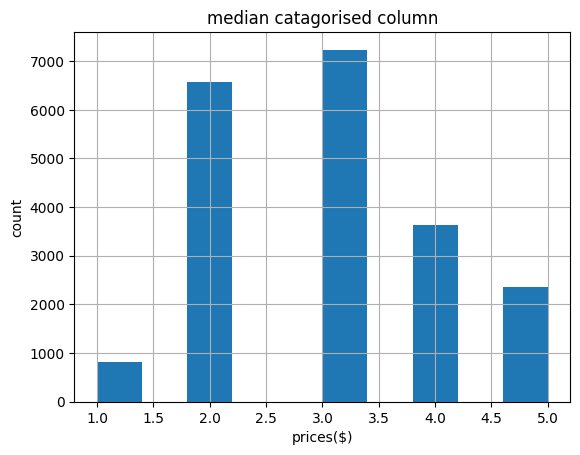

In [413]:
housing['income_cat'].hist()
plt.title('median catagorised column')
plt.xlabel('prices($)')
plt.ylabel('count')

plt.show()

#### Now lets create a Test and trainning sets

In [414]:
X = housing.drop(['median_house_value'], axis= 1)
y = housing['median_house_value']

In [415]:
y = pd.DataFrame(y)
y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [416]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,1,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,1,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,1,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,1,2


In [417]:
#X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, train_size= 0.8, random_state= 23)

#X_test1["income_cat"].value_counts() / len(X_test1)

In [418]:
#X_train1.shape

In [419]:
## the model will use 80 % of data to train and the remaining 20 % == 0.2 as test set
X_train, X_test = train_test_split (X, train_size= 0.8, random_state= 42)

split = StratifiedShuffleSplit(n_splits= 1, test_size= 0.2, random_state= 42)

for train_index, test_index in split.split(X, X['income_cat']):
    strat_train = X.loc[train_index]
    strat_test = X.loc[test_index]

strat_test["income_cat"].value_counts() / len(X_test)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [420]:
for set_ in (strat_train, strat_test):
    set_.drop('income_cat', axis= 1, inplace= True)

In [421]:
strat_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,1
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,2
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,1
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,0
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,0
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,1
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,0
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,0


In [422]:
## scalling
#scaler = StandardScaler()
#X_train_scalled1 = scaler.fit_transform(X_train1)
#X_test_scalled1 = scaler.transform(X_test1)

In [423]:
## scalling
scaler = StandardScaler()
X_train_scalled = scaler.fit_transform(strat_train)
X_test_scalled = scaler.transform(strat_test)

In [424]:
#X_train_scalled1 = pd.DataFrame(X_train_scalled1)

#### Model selection and Training

In [425]:
## a model selection and training the model
#model1 = LinearRegression()

#try:
#    model1.fit(X_train_scalled1, y)
#    print('Model Trained successfully')

#except Exception as e:
#    print(f'The Model failed to train: {e}')  

In [427]:
## a model selection and training the model
model = LinearRegression()

try:
    model.fit(X_train_scalled, y)
    print('Model Trained successfully')

except Exception as e:
    print(f'The Model failed to train: {e}')    

The Model failed to train: Found input variables with inconsistent numbers of samples: [16512, 20640]
